# PROJECT - Segmenting and Classifying the Best Strikers.
## In the world of football, strikers play a pivotal role in deciding the fate of matches and championships. Identifying the best strikers among a pool of talent involves a comprehensive analysis of various factors ranging from performance metrics to personal attributes. In this project, titled "Segmenting and Classifying the Best Strikers," we delve into a dataset containing information on 500 strikers, aiming to uncover patterns, insights, and classifications that distinguish top-performing strikers from the rest.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
project_data = pd.read_excel('Strikers_performance.xlsx')
project_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333


# Data cleaning

In [4]:
missing_values = project_data.isnull().sum()
print('Missing Values:')
missing_values

Missing Values:


Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         6
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          2
Consistency                   0
Penalty Success Rate          5
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='median')
imputer.fit(project_data[['Movement off the Ball']])
project_data[['Movement off the Ball']] = imputer.transform(project_data[['Movement off the Ball']])

In [6]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(strategy ='median')
imputer1.fit(project_data[['Big Game Performance']])
project_data[['Big Game Performance']] = imputer1 .transform(project_data[['Big Game Performance']])

In [7]:
imputer2 = SimpleImputer(strategy ='median')
imputer2.fit(project_data[['Penalty Success Rate']])
project_data[['Penalty Success Rate']] = imputer2.transform(project_data[['Penalty Success Rate']])

In [8]:
project_data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                  float64
Assists                       float64
Shots on Target               float64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball         float64
Hold-up Play                  float64
Aerial Duels Won              float64
Defensive Contribution        float64
Big Game Performance          float64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance    float64
Off-field Conduct             float64
dtype: object

In [9]:
project_data['Big Game Performance'] = project_data['Big Game Performance'].astype(int)
project_data['Goals Scored'] = project_data['Goals Scored'].astype(int)
project_data['Assists'] = project_data['Assists'].astype(int)
project_data['Shots on Target'] = project_data['Shots on Target'].astype(int)
project_data['Movement off the Ball'] = project_data['Movement off the Ball'].astype(int)
project_data['Hold-up Play'] = project_data['Hold-up Play'].astype(int)
project_data['Aerial Duels Won'] = project_data['Aerial Duels Won'].astype(int)
project_data['Defensive Contribution'] = project_data['Big Game Performance'].astype(int)
project_data['Impact on Team Performance'] = project_data['Impact on Team Performance'].astype(int)
project_data['Off-field Conduct'] = project_data['Off-field Conduct'].astype(int)

In [10]:
project_data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                    int64
Assists                         int64
Shots on Target                 int64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball           int64
Hold-up Play                    int64
Aerial Duels Won                int64
Defensive Contribution          int64
Big Game Performance            int64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance      int64
Off-field Conduct               int64
dtype: object

# Descriptive Analysis

In [11]:
round(project_data.describe(),2)

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,6.43,6.43,0.74,0.80,6.52,7.57
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,1.98,1.98,0.10,0.10,2.11,2.09
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,2.00,2.00,0.46,0.53,0.00,0.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,5.00,5.00,0.68,0.72,5.00,6.00
50%,250.50,15.00,8.00,25.00,0.60,0.20,0.70,69.00,60.00,19.00,6.00,6.00,0.75,0.80,6.50,8.00
75%,375.25,18.00,9.00,30.00,0.67,0.23,0.76,76.00,66.00,22.00,8.00,8.00,0.81,0.87,8.00,9.00
max,500.00,34.00,15.00,43.00,0.92,0.36,1.00,98.00,92.00,34.00,12.00,12.00,1.00,1.00,13.00,13.00


# Visualization

## percentage analysis on the variable Footedness

In [12]:
project_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,50,71,15,6,6,0.820314,0.922727,8,11
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,61,53,19,6,6,0.803321,0.678984,3,8
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,65,60,20,3,3,0.766540,0.843858,8,9
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,88,60,22,6,6,0.611798,0.662997,6,8
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,75,54,13,8,8,0.701638,0.906538,8,6


In [13]:
footedness_count = project_data['Footedness'].value_counts()
footedness_count

Footedness
Right-footed    267
Left-footed     233
Name: count, dtype: int64

In [14]:
percentage = round(footedness_count/len(project_data['Footedness'])*100,0)
percentage

Footedness
Right-footed    53.0
Left-footed     47.0
Name: count, dtype: float64

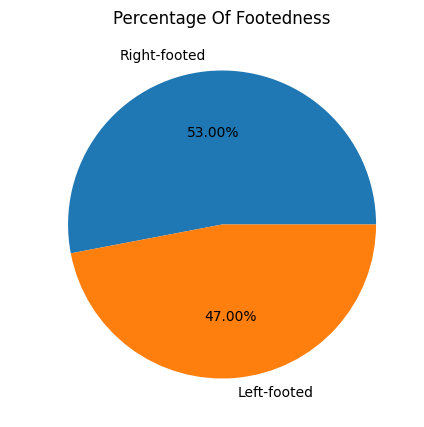

In [95]:
plt.figure(figsize=(10,5))
percentage.plot(kind = "pie", autopct ="%1.2f%%")
plt.title("Percentage Of Footedness")
plt.ylabel(" ")
plt.show()

## Visualize the distribution of players' footedness across different nationalities

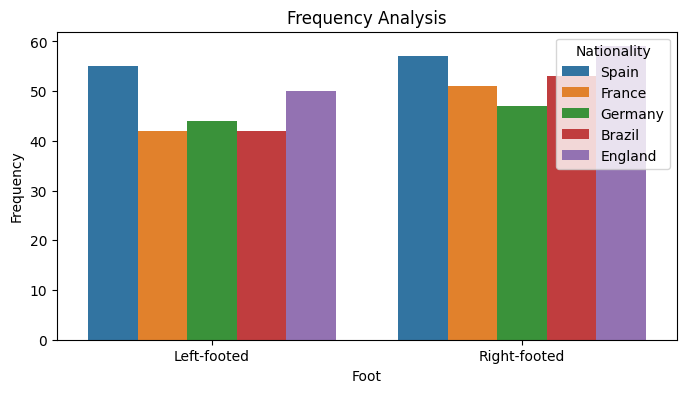

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x = "Footedness",hue = "Nationality", data = project_data)
plt.title("Frequency Analysis")
plt.xlabel("Foot")
plt.ylabel("Frequency")
plt.show()

# Statistical Analysis

## Determine which nationality strikers have the highest average number of goals scored.

In [17]:
project_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,50,71,15,6,6,0.820314,0.922727,8,11
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,61,53,19,6,6,0.803321,0.678984,3,8
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,65,60,20,3,3,0.766540,0.843858,8,9
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,88,60,22,6,6,0.611798,0.662997,6,8
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,75,54,13,8,8,0.701638,0.906538,8,6


In [18]:
highest_goal = round(project_data.groupby("Nationality")["Goals Scored"] .mean())
highest_goal

Nationality
Brazil     15.0
England    14.0
France     14.0
Germany    14.0
Spain      15.0
Name: Goals Scored, dtype: float64

In [93]:
highest_goal_ = project_data["Goals Scored"].max()
print(highest_goal_)

34


## Calculate the average conversion rate for players based on their footedness

In [19]:
avg_conversion_rate = round(project_data.groupby("Footedness")["Conversion Rate"].mean(),3)
avg_conversion_rate

Footedness
Left-footed     0.198
Right-footed    0.201
Name: Conversion Rate, dtype: float64

## Find whether there is any significant difference in consistency rates among strikers from various nationalities.

In [20]:
from scipy.stats import shapiro
numeric_columns = ['Consistency','Hold-up Play']
Shapiro_results = {}
for column in numeric_columns:
    stat,p_value =shapiro(project_data[column])
    Shapiro_results[column] = round(p_value,3)
Shapiro_results

{'Consistency': np.float64(0.451), 'Hold-up Play': np.float64(0.151)}

In [21]:
from scipy import stats

brazil = project_data.query('Nationality =="Brazil"')["Consistency"]
england = project_data.query('Nationality =="England"')["Consistency"]
france = project_data.query('Nationality =="France"')["Consistency"]
germany = project_data.query('Nationality =="Germany"')["Consistency"]
spain = project_data.query('Nationality =="Spain"')["Consistency"]

t_statistics,p_value = stats.f_oneway(brazil,england,france,germany,spain)
print("P-Value:",p_value)

P-Value: 0.19278675901599154


In [94]:
from scipy.stats import levene
stats,p_value = levene(brazil,england,france,germany,spain)
print("P_Value:",p_value)

P_Value: 0.8083990350934653


## Check if there is any significant correlation between strikers' Hold-up play and consistency rate.

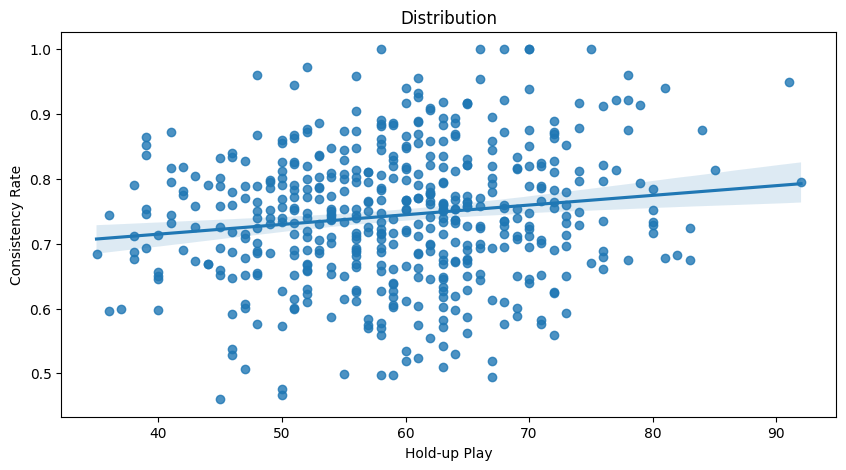

In [22]:
plt.figure(figsize=(10,5))
sns.regplot(x = "Hold-up Play", y ="Consistency", data = project_data)
plt.title("Distribution")
plt.xlabel("Hold-up Play")
plt.ylabel("Consistency Rate")
plt.show()

In [23]:
from scipy.stats import pearsonr
hold_up_play = project_data["Hold-up Play"]
consistency = project_data["Consistency"]

corr, p_value = pearsonr(hold_up_play,consistency)

print("P Values:",p_value)
print("Correlaton Coefficient:",corr)

P Values: 0.0010146963053630409
Correlaton Coefficient: 0.14654573283554145


## Check if strikers' hold-up play significantly influences their consistency rate.

In [24]:
import statsmodels.api as sm

x = project_data["Hold-up Play"]
y = project_data["Consistency"]

x_constant = sm.add_constant(x)
model = sm.OLS(y,x_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Consistency   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.93
Date:                Sun, 21 Sep 2025   Prob (F-statistic):            0.00101
Time:                        13:15:38   Log-Likelihood:                 429.97
No. Observations:                 500   AIC:                            -855.9
Df Residuals:                     498   BIC:                            -847.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6548      0.027     24.031   

# Feature Engineering

## Create a new feature - Total contribution score by summing up specific columns: 'Goals Scored', 'Assists', 'Shots on Target', 'Dribbling Success', 'Aerial Duels Won', 'Defensive Contribution', 'Big Game Performance', 'Consistency'.

In [25]:
project_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,50,71,15,6,6,0.820314,0.922727,8,11
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,61,53,19,6,6,0.803321,0.678984,3,8
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,65,60,20,3,3,0.766540,0.843858,8,9
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,88,60,22,6,6,0.611798,0.662997,6,8
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,75,54,13,8,8,0.701638,0.906538,8,6


In [26]:
project_data["Total contribution score"] = project_data["Goals Scored"] + project_data["Assists"] + project_data["Shots on Target"]  
+ project_data["Dribbling Success"] + project_data["Aerial Duels Won"] + project_data["Defensive Contribution"] 
+ project_data["Big Game Performance"] + project_data["Consistency"]

project_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,50,71,15,6,6,0.820314,0.922727,8,11,61
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,61,53,19,6,6,0.803321,0.678984,3,8,58
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,65,60,20,3,3,0.766540,0.843858,8,9,46
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,88,60,22,6,6,0.611798,0.662997,6,8,51
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,75,54,13,8,8,0.701638,0.906538,8,6,48


## Encode the Footedness and marital status by LabelEncoder.

In [27]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
project_data["Footedness"] = encoder.fit_transform(project_data["Footedness"])

In [28]:
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
project_data["Marital Status"] = encoder1.fit_transform(project_data["Marital Status"])

In [29]:
project_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,15,6,6,0.820314,0.922727,8,11,61
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,19,6,6,0.803321,0.678984,3,8,58
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,20,3,3,0.766540,0.843858,8,9,46
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,22,6,6,0.611798,0.662997,6,8,51
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,13,8,8,0.701638,0.906538,8,6,48


## Create dummy variables for Nationality and add them to the data.

In [30]:
dummies = pd.get_dummies(project_data[["Nationality"]])
project_data_ = pd.concat([project_data,dummies],axis=1)

In [31]:
project_data_.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,...,0.820314,0.922727,8,11,61,False,False,False,False,True
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,...,0.803321,0.678984,3,8,58,False,False,True,False,False
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,...,0.766540,0.843858,8,9,46,False,False,False,True,False
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,...,0.611798,0.662997,6,8,51,False,False,True,False,False
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,...,0.701638,0.906538,8,6,48,False,False,True,False,False


In [37]:
project_data_.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,...,0.820314,0.922727,8,11,61,0,0,0,0,1
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,...,0.803321,0.678984,3,8,58,0,0,1,0,0
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,...,0.766540,0.843858,8,9,46,0,0,0,1,0
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,...,0.611798,0.662997,6,8,51,0,0,1,0,0
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,...,0.701638,0.906538,8,6,48,0,0,1,0,0


# Clustering Analysis

## Perform KMeans clustering

In [53]:
features = project_data_.drop(["Striker_ID","Nationality"], axis = 1)
features.head()

,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain
0,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,...,0.820314,0.922727,8,11,61,0,0,0,0,1
1,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,...,0.803321,0.678984,3,8,58,0,0,1,0,0
2,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,...,0.766540,0.843858,8,9,46,0,0,0,1,0
3,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,...,0.611798,0.662997,6,8,51,0,0,1,0,0
4,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,...,0.701638,0.906538,8,6,48,0,0,1,0,0


In [54]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(features)
    wcss_values = kmeans.inertia_
    wcss.append(wcss_values)

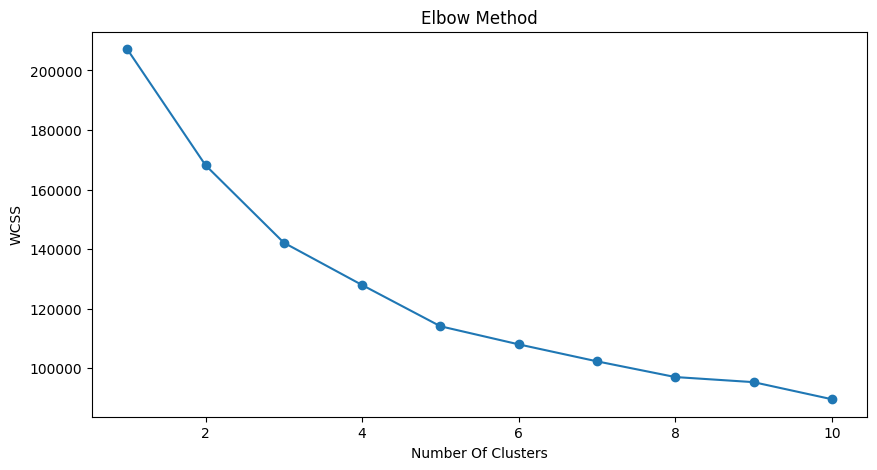

In [55]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,marker = "o")
plt.title("Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS")
plt.show()

In [56]:
final_km = KMeans(n_clusters = 2)
final_km.fit(features)
labels = final_km.labels_

## Calculate the average total contribution score by the value of clusters

In [58]:
project_data_["Clusters"] = labels

In [59]:
project_data_.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Clusters
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,...,0.922727,8,11,61,0,0,0,0,1,0
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,...,0.678984,3,8,58,0,0,1,0,0,0
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,...,0.843858,8,9,46,0,0,0,1,0,1
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,...,0.662997,6,8,51,0,0,1,0,0,0
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,...,0.906538,8,6,48,0,0,1,0,0,0


In [61]:
cluster_avg = round(project_data_.groupby("Clusters")["Total contribution score"].mean())
print("Average Contribution Score by Cluster:")
print(cluster_avg)

Average Contribution Score by Cluster:
Clusters
0    53.0
1    42.0
Name: Total contribution score, dtype: float64


## Assign the tag 'Best strikers' for 0 and 'Regular strikers' for 1 and add a new column 'Strikers types' into the data. Drop the Clusters variable.

In [73]:
mapping = {0:"Best strikers",1:"Regular strikers"}
project_data_["Srikers types"] = project_data_["Clusters"].map(mapping)

In [74]:
project = project_data_.drop(["Clusters"],axis = 1)
project.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Srikers types
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,...,0.922727,8,11,61,0,0,0,0,1,Best strikers
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,...,0.678984,3,8,58,0,0,1,0,0,Best strikers
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,...,0.843858,8,9,46,0,0,0,1,0,Regular strikers
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,...,0.662997,6,8,51,0,0,1,0,0,Best strikers
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,...,0.906538,8,6,48,0,0,1,0,0,Best strikers


## Use feature mapping to map the new feature Strikers types: 'Best strikers' for 1 and 'Regular strikers' for 0

In [75]:
project = project.rename(columns={"Srikers types":"Strikers types"})
project.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Strikers types
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,...,0.922727,8,11,61,0,0,0,0,1,Best strikers
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,...,0.678984,3,8,58,0,0,1,0,0,Best strikers
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,...,0.843858,8,9,46,0,0,0,1,0,Regular strikers
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,...,0.662997,6,8,51,0,0,1,0,0,Best strikers
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,...,0.906538,8,6,48,0,0,1,0,0,Best strikers


In [76]:
mapping1 = {"Best strikers":1,"Regular strikers":0}
project["Strikers types"] = project["Strikers types"].map(mapping1)

In [77]:
project.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Strikers types
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,...,0.922727,8,11,61,0,0,0,0,1,1
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,...,0.678984,3,8,58,0,0,1,0,0,1
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,...,0.843858,8,9,46,0,0,0,1,0,0
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,...,0.662997,6,8,51,0,0,1,0,0,1
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,...,0.906538,8,6,48,0,0,1,0,0,1


# Machine Learning Model

In [78]:
x = features
y = project["Strikers types"]

## Perform feature scaling with StandardScaler and split the data into train and test sets where the test data size will be 20%.

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(x)
scaled

array([[-1.07047781, -1.03252879,  0.5050467 , ..., -0.47801802,
        -0.47169258,  1.86125917],
       [-1.07047781,  0.968496  , -0.10638998, ...,  2.09197134,
        -0.47169258, -0.53727069],
       [-1.07047781, -1.03252879,  0.70885893, ..., -0.47801802,
         2.12002488, -0.53727069],
       ...,
       [-1.07047781,  0.968496  , -0.10638998, ..., -0.47801802,
        -0.47169258, -0.53727069],
       [ 0.93416229,  0.968496  , -0.9216389 , ..., -0.47801802,
        -0.47169258, -0.53727069],
       [-1.07047781, -1.03252879, -1.32926335, ..., -0.47801802,
        -0.47169258, -0.53727069]], shape=(500, 23))

In [83]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(scaled,y,test_size = 0.2,random_state = 42)

## Build a logistic regression machine learning model to predict strikers type, Make predictions and evaluate by calculating the accuracy percentage and Create the confusion matrix and visualize it.


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test,prediction)
print(accuracy * 100, "%")

94.0 %


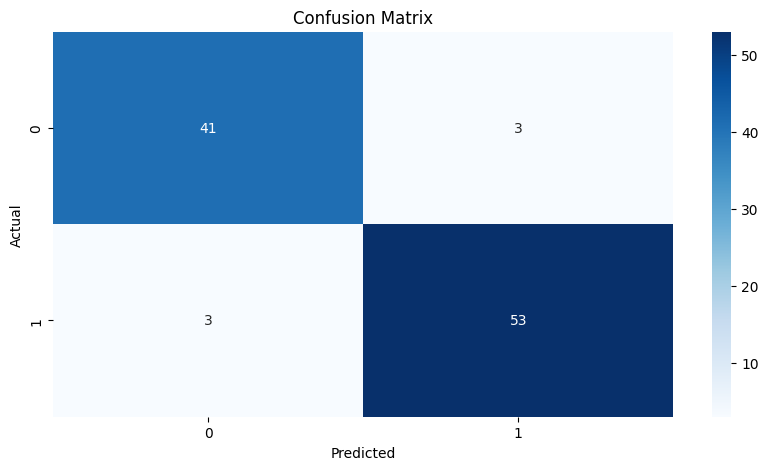

In [88]:
conf_matrix = confusion_matrix(y_test,prediction)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot = True, fmt ="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()